In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load diabetes dataset
df = pd.read_csv('/content/diabetes.csv')

# Split into training and test sets
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for LSTM input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM models to train and evaluate
models = [
    # Simple LSTM model with one LSTM layer and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with two LSTM layers and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), return_sequences=True),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # Bidirectional LSTM model with one LSTM layer and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(1, 8)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with dropout
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with L2 regularization
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
]

# Train and evaluate models
for i, model in enumerate(models):
    print(f"Model {i+1}")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, callbacks=[early_stop], validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"- Loss: {loss:.2f}")
    print(f"- Accuracy: {accuracy:.2f}")
    y_pred = model.predict(X_test).round()
    print(f"- F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"- Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"- Recall: {recall_score(y_test, y_pred):.2f}")


Model 1
Epoch 1/50
62/62 [==============================] - 5s 14ms/step - loss: 0.6785 - accuracy: 0.6401 - val_loss: 0.6566 - val_accuracy: 0.6948
Epoch 2/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6651 - accuracy: 0.6401 - val_loss: 0.6387 - val_accuracy: 0.6948
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6589 - accuracy: 0.6401 - val_loss: 0.6308 - val_accuracy: 0.6948
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6529 - accuracy: 0.6401 - val_loss: 0.6226 - val_accuracy: 0.6948
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6401 - val_loss: 0.6154 - val_accuracy: 0.6948
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6396 - accuracy: 0.6417 - val_loss: 0.6063 - val_accuracy: 0.6948
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6304 - accuracy: 0.6450 - val_loss: 0.5936 - val_accuracy: 0.6948
Epoch 8/50


Model 1
Epoch 1/50
62/62 [==============================] - 8s 59ms/step - loss: 0.4698 - accuracy: 0.7704 - val_loss: 0.4330 - val_accuracy: 0.7987
Epoch 2/50
62/62 [==============================] - 1s 8ms/step - loss: 0.4681 - accuracy: 0.7785 - val_loss: 0.4241 - val_accuracy: 0.8117
Epoch 3/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4676 - accuracy: 0.7638 - val_loss: 0.4311 - val_accuracy: 0.7922
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4706 - accuracy: 0.7704 - val_loss: 0.4254 - val_accuracy: 0.8117
Epoch 5/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4684 - accuracy: 0.7687 - val_loss: 0.4261 - val_accuracy: 0.8117
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4677 - accuracy: 0.7671 - val_loss: 0.4319 - val_accuracy: 0.7987
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.7801 - val_loss: 0.4298 - val_accuracy: 0.7922
Epoch 8/50


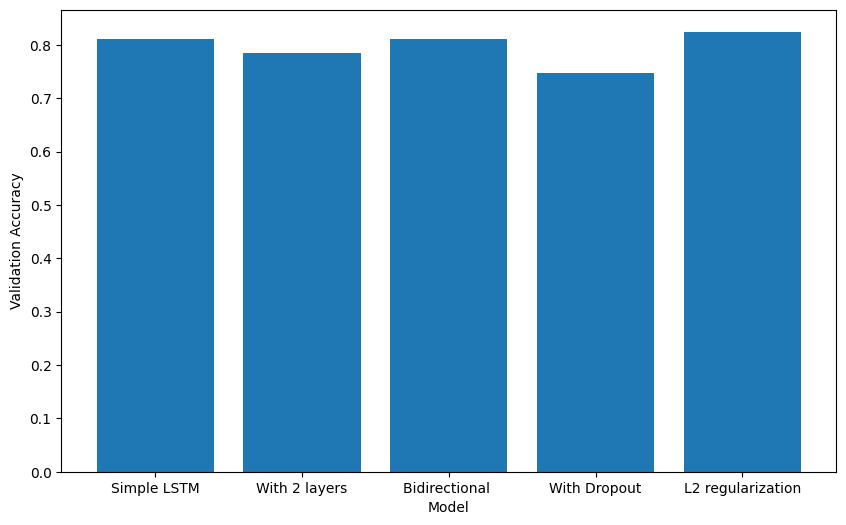

In [13]:
# Define a lista com as métricas para cada modelo
metrics = []

# Train and evaluate models
for i, model in enumerate(models):
    print(f"Model {i+1}")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, callbacks=[early_stop], validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"- Loss: {loss:.2f}")
    print(f"- Accuracy: {accuracy:.2f}")
    y_pred = model.predict(X_test).round()
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    metrics.append((accuracy, f1, precision, recall))

# Plot accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(range(len(metrics)), [metric[0] for metric in metrics])
plt.xticks(range(len(metrics)), ['Simple LSTM', 'With 2 layers', 'Bidirectional ', 'With Dropout', 'L2 regularization'])
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')
plt.show()


In [18]:
# Lista para armazenar as métricas de cada modelo
metrics = []

# Train and evaluate models
for i, model in enumerate(models):
    print(f"Model {i+1}")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, callbacks=[early_stop], validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test).round()
    metrics.append({
        'Model': f'Model {i+1}',
        'Loss': round(loss, 2),
        'Accuracy': round(accuracy, 2),
        'F1 Score': round(f1_score(y_test, y_pred), 2),
        'Precision': round(precision_score(y_test, y_pred), 2),
        'Recall': round(recall_score(y_test, y_pred), 2)
    })




Model 1
Epoch 1/50
62/62 [==============================] - 4s 14ms/step - loss: 0.4644 - accuracy: 0.7834 - val_loss: 0.4202 - val_accuracy: 0.8117
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7687 - val_loss: 0.4207 - val_accuracy: 0.8182
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.7736 - val_loss: 0.4220 - val_accuracy: 0.8117
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4641 - accuracy: 0.7704 - val_loss: 0.4357 - val_accuracy: 0.8052
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.7785 - val_loss: 0.4264 - val_accuracy: 0.7987
Epoch 6/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.7736 - val_loss: 0.4413 - val_accuracy: 0.7987
Epoch 7/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7736 - val_loss: 0.4282 - val_accuracy: 0.7987
Epoch 8/50


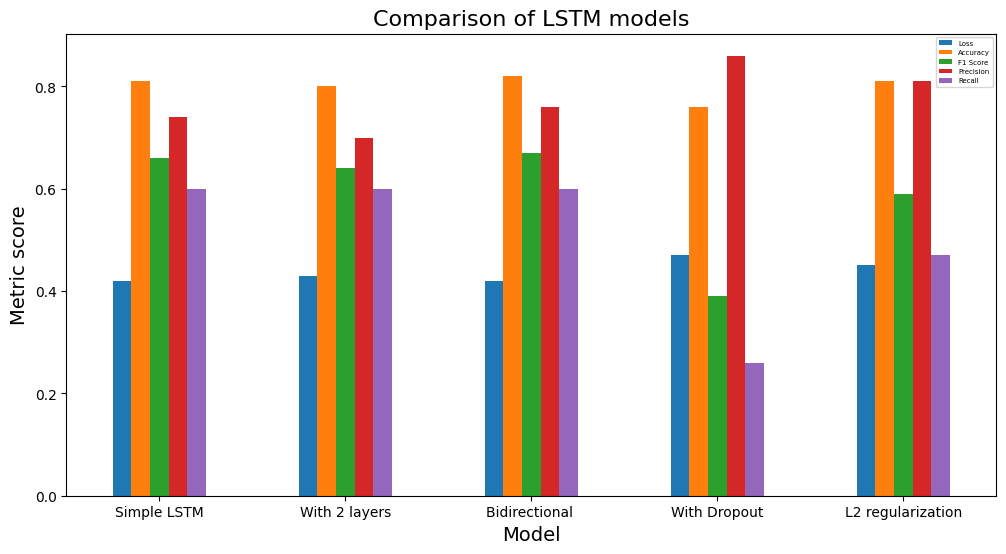

In [66]:
# Create a dataframe to store the metrics of each model
metrics_df = pd.DataFrame(metrics)

# Set the Model column as index
metrics_df.set_index('Model', inplace=True)

# Plot a bar chart with the metrics of each model
metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of LSTM models', fontsize=16)
plt.xticks(range(len(metrics_df)), ['Simple LSTM', 'With 2 layers', 'Bidirectional ', 'With Dropout', 'L2 regularization'])
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=0)
plt.ylabel('Metric score', fontsize=14)
plt.legend(fontsize=5)
plt.show()

In [67]:
# Create a list to store the validation loss of each model
val_loss = []

# Create a list to store the validation accuracy of each model
val_acc = []

# Create a list to store the F1 score of each model
f1 = []

# Create a list to store the precision score of each model
precision = []

# Create a list to store the recall score of each model
recall = []

# Train and evaluate models
for i, model in enumerate(models):
    print(f"Model {i+1}")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, callbacks=[early_stop], validation_data=(X_test, y_test))
    val_loss.append(history.history['val_loss'][-1])
    val_acc.append(history.history['val_accuracy'][-1])
    y_pred = model.predict(X_test).round()
    f1.append(f1_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))


Model 1
Epoch 1/50
62/62 [==============================] - 4s 16ms/step - loss: 0.4752 - accuracy: 0.7687 - val_loss: 0.4236 - val_accuracy: 0.8182
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7704 - val_loss: 0.4250 - val_accuracy: 0.8182
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7671 - val_loss: 0.4241 - val_accuracy: 0.8182
Epoch 4/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4760 - accuracy: 0.7769 - val_loss: 0.4283 - val_accuracy: 0.8052
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.4751 - accuracy: 0.7655 - val_loss: 0.4249 - val_accuracy: 0.8117
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.7590 - val_loss: 0.4249 - val_accuracy: 0.8182
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 0.4743 - accuracy: 0.7655 - val_loss: 0.4252 - val_accuracy: 0.8182
Epoch 8/50


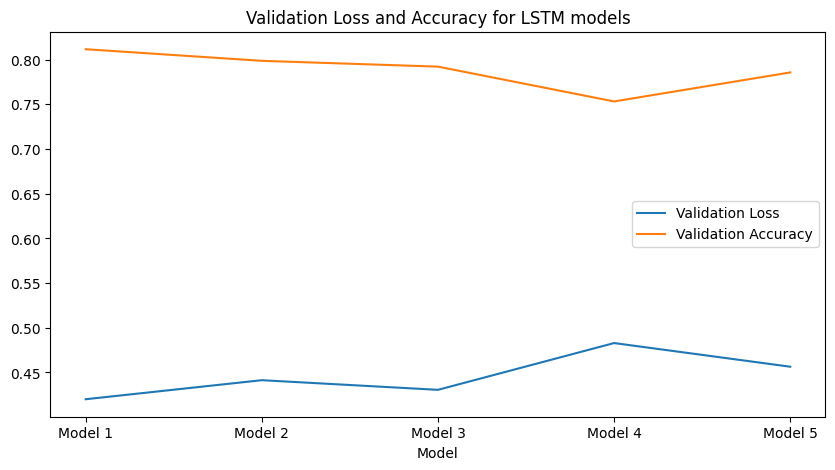

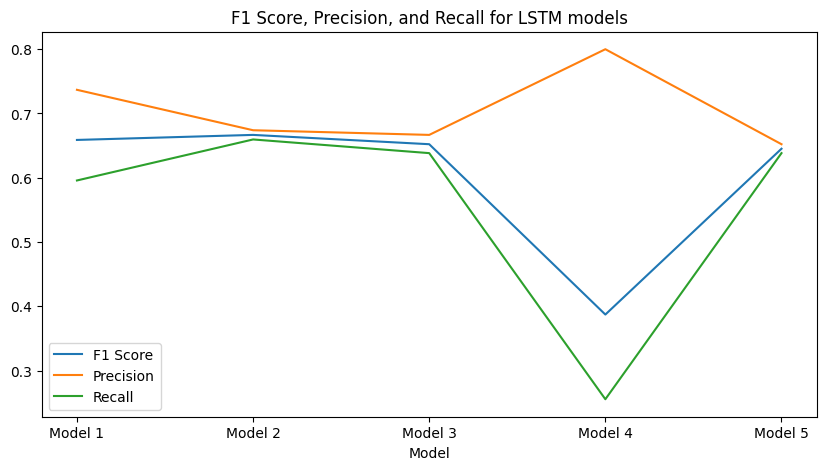

In [22]:

# Create a dataframe to store the metrics of each model
metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'],
    'Validation Loss': val_loss,
    'Validation Accuracy': val_acc,
    'F1 Score': f1,
    'Precision': precision,
    'Recall': recall
})

# Set the 'Model' column as the index of the dataframe
metrics_df.set_index('Model', inplace=True)

# Plot the validation loss and validation accuracy of each model
plt.figure(figsize=(10, 5))
plt.plot(metrics_df['Validation Loss'], label='Validation Loss')
plt.plot(metrics_df['Validation Accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Validation Loss and Accuracy for LSTM models')
plt.xlabel('Model')
plt.xticks(np.arange(len(metrics_df)), metrics_df.index)
plt.show()

# Plot the F1 score, precision, and recall of each model
plt.figure(figsize=(10, 5))
plt.plot(metrics_df['F1 Score'], label='F1 Score')
plt.plot(metrics_df['Precision'], label='Precision')
plt.plot(metrics_df['Recall'], label='Recall')
plt.legend()
plt.title('F1 Score, Precision, and Recall for LSTM models')
plt.xlabel('Model')
plt.xticks(np.arange(len(metrics_df)), metrics_df.index)
plt.show()


In [70]:
# Define LSTM models to train and evaluate
models = [
    # Simple LSTM model with one LSTM layer and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with two LSTM layers and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), return_sequences=True),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # Bidirectional LSTM model with one LSTM layer and one dense output layer
    tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=(1, 8)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with dropout
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), dropout=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]),
    # LSTM model with L2 regularization
    tf.keras.Sequential([
        tf.keras.layers.LSTM(32, input_shape=(1, 8), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
]

# Train and evaluate models
best_accuracy = 0.0
best_model = None
for i, model in enumerate(models):
    print(f"Model {i+1}")
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=50, batch_size=10, callbacks=[early_stop], validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"- Loss: {loss:.2f}")
    print(f"- Accuracy: {accuracy:.2f}")
    y_pred = model.predict(X_test).round()
    print(f"- F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"- Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"- Recall: {recall_score(y_test, y_pred):.2f}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


Model 1
Epoch 1/50
62/62 [==============================] - 3s 12ms/step - loss: 0.6813 - accuracy: 0.6401 - val_loss: 0.6607 - val_accuracy: 0.6948
Epoch 2/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6401 - val_loss: 0.6477 - val_accuracy: 0.6948
Epoch 3/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.6401 - val_loss: 0.6365 - val_accuracy: 0.6948
Epoch 4/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6579 - accuracy: 0.6401 - val_loss: 0.6304 - val_accuracy: 0.6948
Epoch 5/50
62/62 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6401 - val_loss: 0.6230 - val_accuracy: 0.6948
Epoch 6/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6471 - accuracy: 0.6401 - val_loss: 0.6151 - val_accuracy: 0.6948
Epoch 7/50
62/62 [==============================] - 0s 5ms/step - loss: 0.6389 - accuracy: 0.6401 - val_loss: 0.6042 - val_accuracy: 0.6948
Epoch 8/50


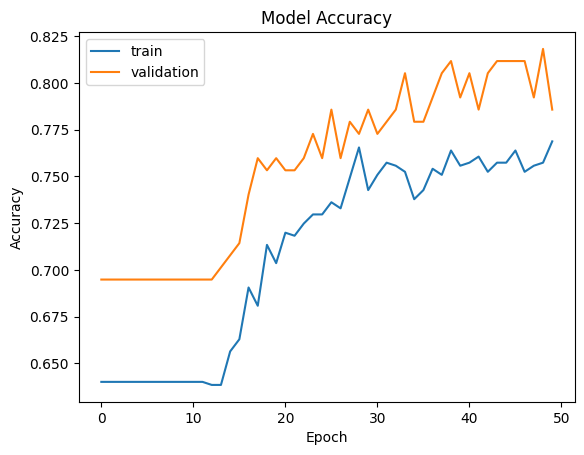

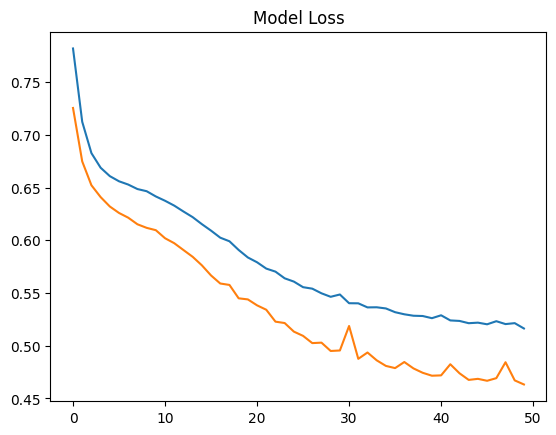

In [71]:
# Plot learning curves for best model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
# Save best model
best_model.save('best_model.h5')
